<a href="https://colab.research.google.com/github/LucyAdhiambo/Colab-projects/blob/main/Semen_Purchases_Distribution_by_County.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files

In [44]:
uploaded = files.upload()

Saving SEMEN DISTRIBUTION ANALYSIS.xlsx to SEMEN DISTRIBUTION ANALYSIS (2).xlsx


In [45]:
import geopandas as gpd

# Load the uploaded file
kenya = gpd.read_file("kenyan-counties.geojson")
kenya.head()

,OBJECTID,AREA,PERIMETER,COUNTY3_,COUNTY3_ID,COUNTY,Shape_Leng,Shape_Area,geometry
0,1,5.677,15.047,2,1,Turkana,15.046838,5.676985,"POLYGON ((35.79593 5.34449, 35.79659 5.34468, ..."
1,2,6.177,11.974,3,2,Marsabit,11.974165,6.176831,"POLYGON ((36.05061 4.45622, 36.23184 4.45124, ..."
2,3,2.117,7.355,4,3,Mandera,7.355154,2.117196,"POLYGON ((41.62133 3.97673, 41.62272 3.9786, 4..."
3,4,4.610,9.838,5,4,Wajir,9.838408,4.609589,"POLYGON ((39.31812 3.47197, 39.31956 3.47168, ..."
4,5,0.740,5.030,6,5,West Pokot,5.030271,0.740481,"POLYGON ((35.12745 2.62271, 35.12762 2.62302, ..."


In [46]:
uploaded_excel = files.upload()

Saving SEMEN DISTRIBUTION ANALYSIS.xlsx to SEMEN DISTRIBUTION ANALYSIS (3).xlsx


In [47]:
df = pd.read_excel("SEMEN DISTRIBUTION ANALYSIS.xlsx")
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,COUNTY,NUMBER OF DOSES
1,NaN,KIAMBU,74
2,NaN,MURANGA,60
3,NaN,NAIROBI,43
4,NaN,KIRINYAGA,38


In [48]:
# Keep only the useful columns: column 1 = COUNTY, column 2 = NUMBER OF DOSES
df = df.iloc[:, 1:3]

# Rename them
df.columns = ["County", "Purchases"]

# Convert purchases to numbers
df["Purchases"] = pd.to_numeric(df["Purchases"], errors="coerce")

# Remove the row with 'TOTAL'
df = df[df['County'] != 'TOTAL'].copy()

# Convert county names to lowercase for case-insensitive matching
df["County"] = df["County"].str.lower()

# Correct the specific mismatch for Murang'a (lowercase)
df["County"] = df["County"].replace("muranga", "murang'a")


df.head()

,County,Purchases
0,county,NaN
1,kiambu,74.0
2,murang'a,60.0
3,nairobi,43.0
4,kirinyaga,38.0


In [49]:
kenya.columns


Index(['OBJECTID', 'AREA', 'PERIMETER', 'COUNTY3_', 'COUNTY3_ID', 'COUNTY',
       'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

In [51]:
# Print df before merge
print("df before merge:")
print(df.head())
print("\nCounty names in df before merge:", df["County"].unique())
print("\nPurchases column in df before merge:")
print(df["Purchases"].head())
print("\nNon-finite values in Purchases before merge:", df["Purchases"].isna().sum() + (df["Purchases"] == float('inf')).sum() + (df["Purchases"] == float('-inf')).sum())


# Drop potentially existing 'County' and 'Purchases' columns from previous merges
kenya = kenya.drop(columns=['County', 'Purchases'], errors='ignore')

# Convert county names in kenya to lowercase for case-insensitive matching
kenya["COUNTY"] = kenya["COUNTY"].str.lower()

# Filter df to only include counties present in kenya
df = df[df['County'].isin(kenya['COUNTY'])].copy()

# Print df after filtering
print("\ndf after filtering:")
print(df.head())
print("\nCounty names in df after filtering:", df["County"].unique())


# Merge on county name
kenya = kenya.merge(df, left_on="COUNTY", right_on="County", how="left")

df before merge:
      County  Purchases
1     kiambu       74.0
2   murang'a       60.0
3    nairobi       43.0
4  kirinyaga       38.0
5    kajiado       33.0

County names in df before merge: ['kiambu' "murang'a" 'nairobi' 'kirinyaga' 'kajiado' 'machakos' 'nyeri'
 'embu' 'meru' 'laikipia' 'kisumu' 'nakuru' 'kakamega' 'migori' 'busia']

Purchases column in df before merge:
1    74.0
2    60.0
3    43.0
4    38.0
5    33.0
Name: Purchases, dtype: float64

Non-finite values in Purchases before merge: 0

df after filtering:
      County  Purchases
1     kiambu       74.0
2   murang'a       60.0
3    nairobi       43.0
4  kirinyaga       38.0
5    kajiado       33.0

County names in df after filtering: ['kiambu' "murang'a" 'nairobi' 'kirinyaga' 'kajiado' 'machakos' 'nyeri'
 'embu' 'meru' 'laikipia' 'kisumu' 'nakuru' 'kakamega' 'migori' 'busia']


/tmp/ipython-input-1421931253.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  kenya["centroid"] = kenya.geometry.centroid


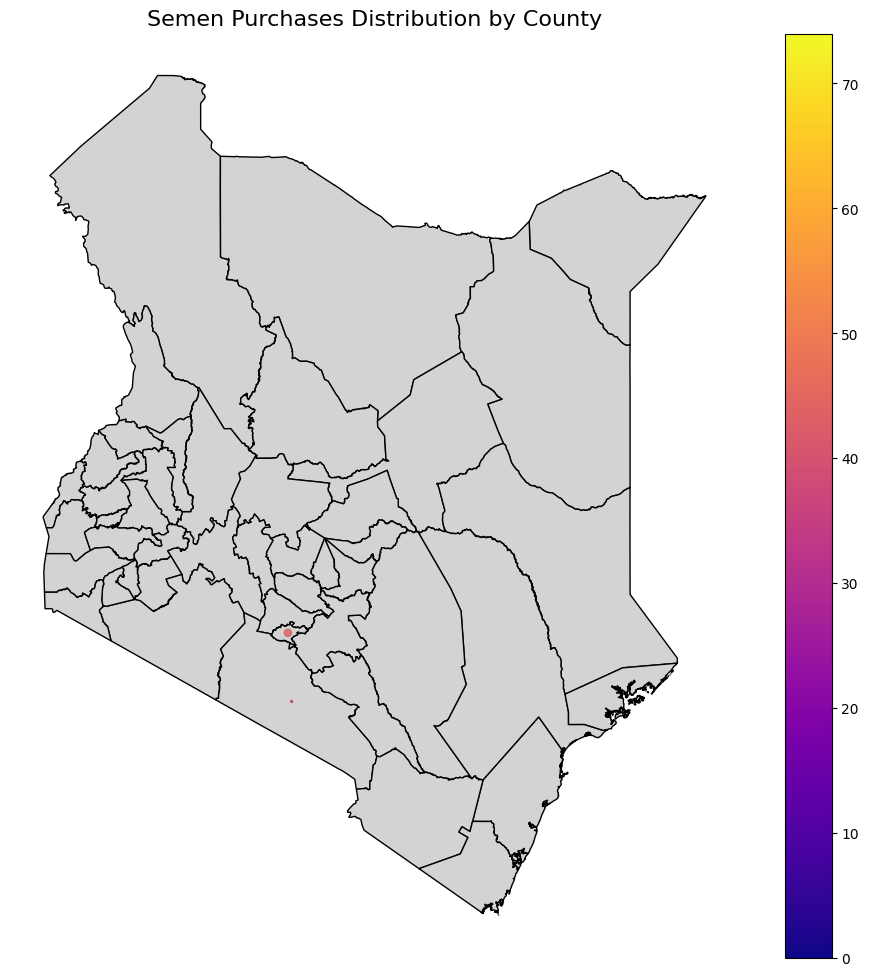

In [53]:
import matplotlib.pyplot as plt

# Plot Kenya counties
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
kenya.plot(ax=ax, color="lightgrey", edgecolor="black")

# Plot purchases as colored points at county centroids
kenya["centroid"] = kenya.geometry.centroid
kenya_points = kenya.copy()
kenya_points.set_geometry("centroid", inplace=True)

kenya_points.plot(
    ax=ax,
    column="Purchases",
    cmap="plasma",       # colorful colormap: try "viridis", "coolwarm", etc.
    markersize=kenya_points["Purchases"] * 2,  # bigger size = more purchases
    legend=True,
    alpha=0.8
)

plt.title("Semen Purchases Distribution by County", fontsize=16)
plt.axis("off")
plt.show()


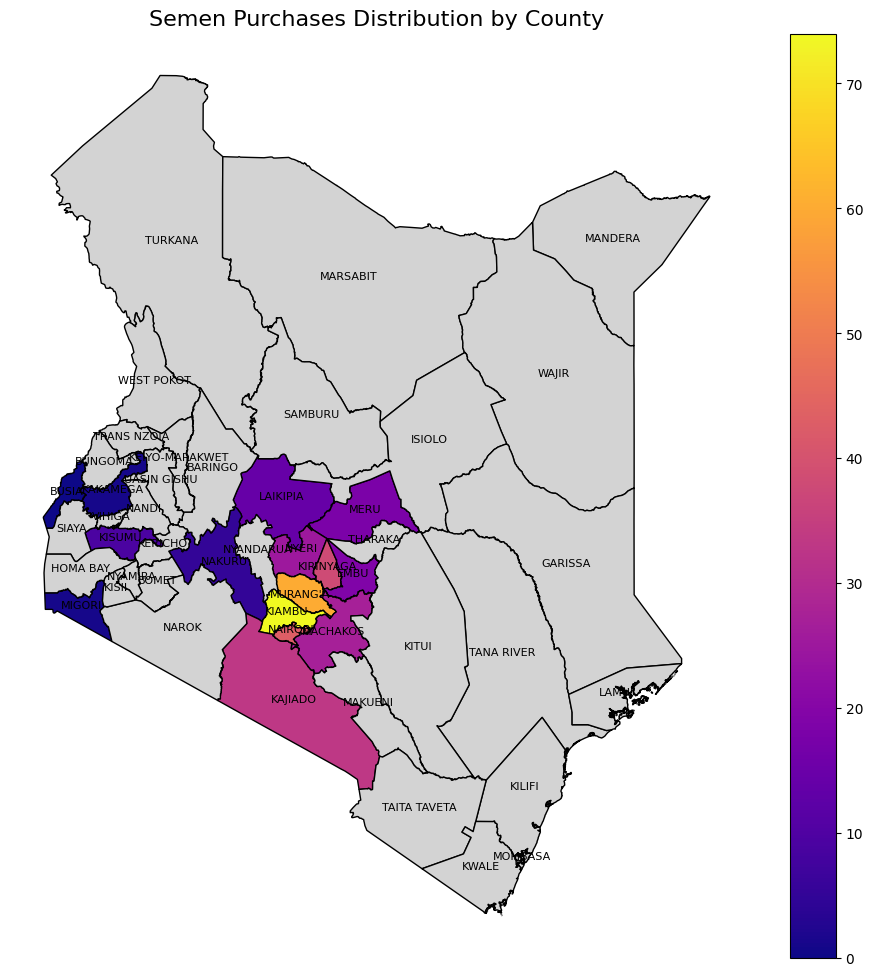

In [69]:
import matplotlib.pyplot as plt

# Reproject to a suitable projected CRS (e.g., UTM)
kenya_projected = kenya.to_crs(epsg=32637) # UTM Zone 37N, common for Kenya

# Base map of Kenya counties, colored by Purchases
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
kenya_projected.plot(
    ax=ax,
    column="Purchases",  # Color counties by Purchases
    cmap="plasma",         # Use a colormap to show variation
    legend=True,           # Add a legend
    edgecolor="black",     # Add county borders
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "black",
        # Removed hatch: "///", # Removed shading lines
        "label": "No data",
    }, # Style for counties with no data
)

# Add county names near the dots
# Calculate centroids for labeling on the projected data
kenya_projected["centroid"] = kenya_projected.geometry.centroid

# Add county names at centroids
for x, y, label in zip(kenya_projected.centroid.x, kenya_projected.centroid.y, kenya_projected["COUNTY"].str.upper()):
    # Manual adjustments for specific overlapping counties
    if label == "NYERI":
        plt.text(x + 5000, y + 5000, label, fontsize=8, ha="center", color="black") # Adjusted position for Nyeri
    elif label == "MURANG'A":
         plt.text(x - 5000, y - 5000, label, fontsize=8, ha="center", color="black") # Adjusted position for Murang'a
    elif label == "NAIROBI":
         plt.text(x + 2000, y + 2000, label, fontsize=8, ha="center", color="black") # Adjusted position for Nairobi
    elif label == "MACHAKOS":
         plt.text(x - 2000, y - 2000, label, fontsize=8, ha="center", color="black") # Adjusted position for Machakos
    else:
        plt.text(x, y, label, fontsize=8, ha="center", color="black") # Default position


# --- Add a big green dot and label for Lari county ---
# Find Lari county in the projected data (still using lowercase for matching)
lari_county = kenya_projected[kenya_projected["COUNTY"] == "lari"]

# Check if Lari county was found
if not lari_county.empty:
    # Calculate the centroid of Lari county
    lari_centroid = lari_county.geometry.centroid.iloc[0]

    # Plot a big green dot at the centroid
    ax.plot(lari_centroid.x, lari_centroid.y, marker='o', color='green', markersize=20, label="Lari Shop Location")

    # Add the label "LARI" next to the dot (capitalized)
    ax.text(lari_centroid.x, lari_centroid.y, "LARI", fontsize=12, ha='center', va='bottom', color='black')

# --- End of Lari county addition ---


plt.title("Semen Purchases Distribution by County", fontsize=16)
plt.axis("off")
plt.show()

# Task
Analyze the provided data to identify the top counties by purchases, calculate the total purchases in Kenya, and determine the percentage of total purchases represented by the top counties.

## Identify top counties

### Subtask:
Sort the data by the 'Purchases' column in descending order and select the top counties.


**Reasoning**:
Sort the dataframe by 'Purchases' and select the top 5 rows.



In [56]:
top_counties = df.sort_values(by='Purchases', ascending=False).head(5)
top_counties

,County,Purchases
1,kiambu,74.0
2,murang'a,60.0
3,nairobi,43.0
4,kirinyaga,38.0
5,kajiado,33.0


## Calculate total purchases

### Subtask:
Sum the 'Purchases' column to get the total semen purchases in Kenya.


**Reasoning**:
Sum the 'Purchases' column in the DataFrame `df` to calculate the total purchases.



In [57]:
total_purchases = df['Purchases'].sum()
total_purchases

np.float64(367.0)

## Calculate percentage for top regions

### Subtask:
For the top counties identified, calculate the sum of their purchases and then calculate this sum as a percentage of the total purchases in Kenya.


**Reasoning**:
Calculate the sum of purchases for the top counties and then calculate the percentage of total purchases represented by these top counties.



In [58]:
sum_top_counties_purchases = top_counties['Purchases'].sum()
percentage_top_counties = (sum_top_counties_purchases / total_purchases) * 100

print(f"Sum of purchases for top counties: {sum_top_counties_purchases}")
print(f"Percentage of total purchases by top counties: {percentage_top_counties:.2f}%")

Sum of purchases for top counties: 248.0
Percentage of total purchases by top counties: 67.57%


## Present results

### Subtask:
Display the top counties and their calculated percentage of the total purchases.


**Reasoning**:
Display the top counties DataFrame and the calculated percentage of total purchases for these counties.



In [59]:
print("Top Counties by Purchases:")
display(top_counties)

print(f"\nPercentage of total purchases by top counties: {percentage_top_counties:.2f}%")

Top Counties by Purchases:


,County,Purchases
1,kiambu,74.0
2,murang'a,60.0
3,nairobi,43.0
4,kirinyaga,38.0
5,kajiado,33.0



Percentage of total purchases by top counties: 67.57%


## Summary:

### Data Analysis Key Findings

*   The top 5 counties by purchases were identified.
*   The total purchases in Kenya amounted to 367.0.
*   The sum of purchases for the top counties is 248.0.
*   The top counties account for approximately 67.57% of the total purchases in Kenya.

### Insights or Next Steps

*   The top counties represent a significant portion of the total purchases, indicating a concentration of market activity in these regions.
*   Further analysis could explore the factors contributing to the high purchase volumes in the top counties.
